In [2]:
# Math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy.random import Generator, PCG64
import random
from scipy.stats import norm
import scipy.optimize as optimize
import time

# Ez parallelization
from joblib import Parallel, delayed

# File Handling
from sys import getsizeof
import _pickle as pickle
# Alternatively use JSON which will be human readable
# import json

# Custom imports
from global_cache import Global_Cache
import base_from_gen as bg
import pricing_func as pf
from path_datatype import Path


In [3]:
with open("1HWRunDemo.pkl","rb") as fp:
    paths = pickle.load(fp)


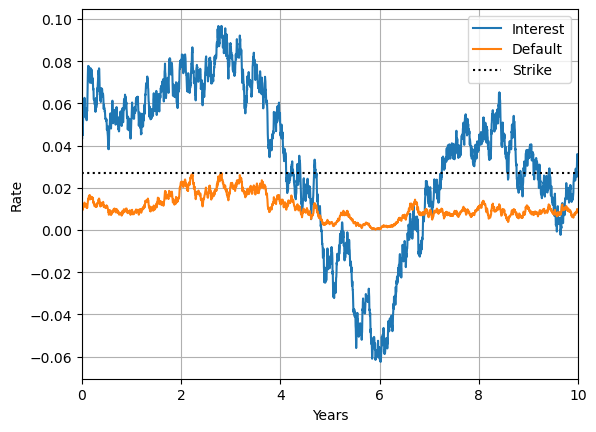

In [32]:
# Plot the market params
path = paths[0]
plt.plot(path.t_s,path.r);
plt.plot(path.t_s,path.lambdas);
plt.hlines(path.K, xmin = -1, xmax = 11, color = 'black',linestyles=':')
plt.grid()
plt.xlabel("Years")
plt.xlim([0,10])
plt.ylabel("Rate")
plt.legend(["Interest","Default","Strike"]);

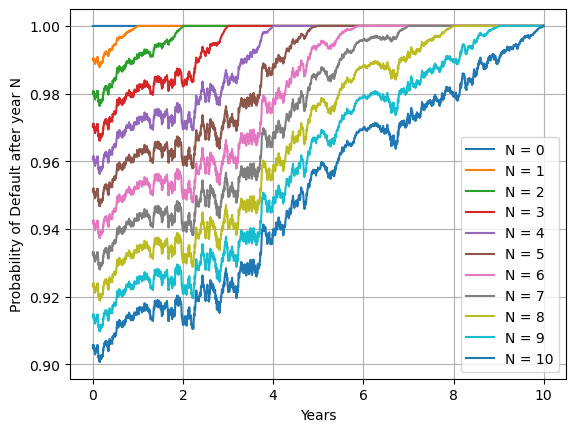

In [5]:
# Try a plot of many Q_s
path = paths[0]
plt.plot(path.t_s,np.transpose(path.Q_s[:]));
plt.grid()
plt.xlabel("Years")
plt.ylabel("Probability of Default after year N")
plt.legend(["N = 0", "N = 1", "N = 2", "N = 3", "N = 4", "N = 5", "N = 6", "N = 7", "N = 8", "N = 9", "N = 10"]);

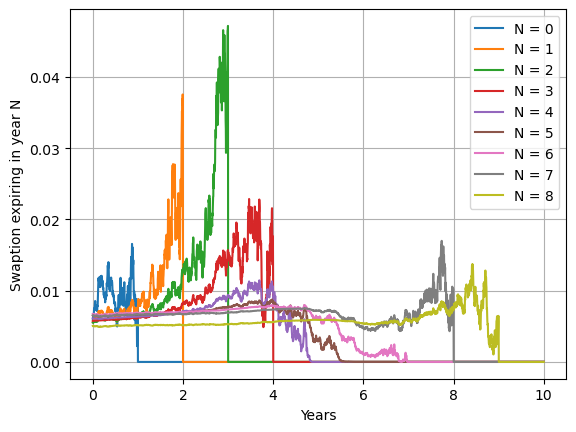

In [7]:
# Try a plot of the Swaptions
path = paths[0]
plt.plot(path.t_s,np.transpose(path.Swaptions[1:]));
plt.grid()
plt.xlabel("Years")
plt.ylabel("Swaption expiring in year N")
plt.legend(["N = 0", "N = 1", "N = 2", "N = 3", "N = 4", "N = 5", "N = 6", "N = 7", "N = 8", "N = 9"]);

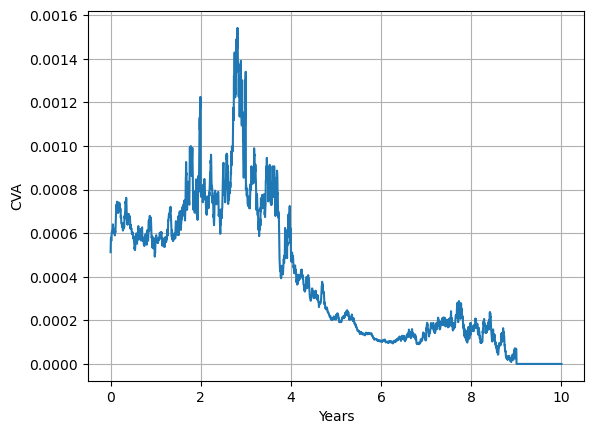

In [63]:
# And of the CVA
path = paths[0]
plt.plot(path.t_s,path.CVA)
plt.grid()
plt.xlabel("Years")
plt.ylabel("CVA");

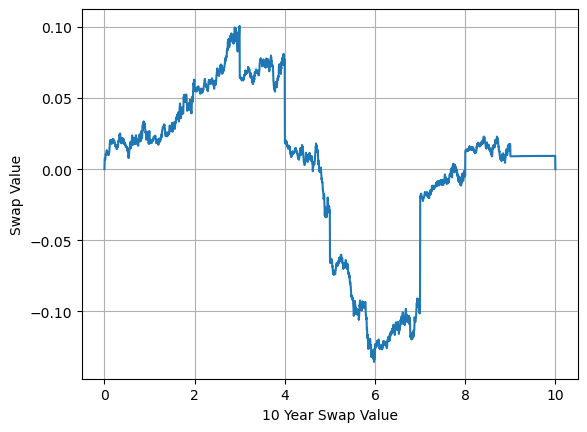

In [69]:
# And of the underlying Swap
path = paths[0]
plt.plot(path.t_s,path.Swaps[0])
plt.grid()
plt.xlabel("10 Year Swap Value")
plt.ylabel("Swap Value");